In [13]:
import pickle
import yaml
import pandas as pd
import pickle
import sys
import numpy as np

import matplotlib.pyplot as plot

In [14]:
def loadConfig():
    with open('./light_config.yaml', "r") as ymlfile: 
        cfg = yaml.load(ymlfile)
    return cfg

config = loadConfig()

/home/wesleyjtann/miniconda3/envs/ddos/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
import math

def calculateFalsePositives(agtIPList, agt_attacks, scoreDict, percentages, numNorm) :
    numNormal = numNorm
    numTotalIP = len(scoreDict)
    cutOff = []
    falsepositives = []
    
    for percent in percentages :
        cutOff.append(math.ceil(numTotalIP * percent))
    
    index = 0
    fp_count = 0 # add
    tp_count = 0 # add
    truepos = [] # add
    
    for (IP, IPD, score) in list(scoreDict.itertuples(index=False, name=None)):
        if IP + IPD in agtIPList: # add
            fp_count = fp_count + 1 # add
        if IP + IPD in agt_attacks:
            tp_count = tp_count + 1            
            
        index = index + 1
        if index in cutOff :
            falsepositives.append(fp_count/numNormal)
            truepos.append(tp_count / len(agt_attacks)) #len(agt_attacks)) # add
            
    return falsepositives, truepos

""" including iter_classifier_two"""
# def plotAndSaveGraph(PQ, P, PQTil, classifier_rejectthres, fp_classifier, iter_classifier_one, iter_classifier_two, 
#                      iter_classifier, config, plt=False):
#     percentages = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

#     plot.rcParams['figure.figsize'] = [9, 9]
#     fig = plot.figure()
#     ax = plot.subplot(111)
#     # #ax.plot(percentages, old_graphScoreList, label = "Old P Over Q Scores")
#     # #ax.plot(percentages, old_graphPList, label = "Old P Scores")
#     ax.plot(percentages, percentages, linewidth=2, label = "Randomized Rejection")
#     ax.plot(percentages, P, linewidth=2, linestyle='--', marker='o', markersize=9, label = "N Only")
#     ax.plot(percentages, PQ, linewidth=2, linestyle=':', label = "N/D (ℓ=1)") #With Transfer")
#     ax.plot(percentages, PQTil, linewidth=2, linestyle='-.', label = "N/D (ℓ=∞)") #Without Transfer") 
# #     ax.plot(percentages, Qonline, label = "Online Q")
# #     ax.plot(percentages, Qoffline, label = "Offline Q") 
#     ax.plot(percentages, iter_classifier_one, linewidth=2, linestyle='--', label = "Iter. Classifier (ℓ=1)") #Without Transfer")    
#     ax.plot(percentages, iter_classifier, linewidth=2, linestyle='--', marker='s', markersize=9, label = "Iter. Classifier (ℓ=∞)") #Without Transfer")
#     ax.plot(percentages, iter_classifier_two, linewidth=2, linestyle='--', marker='^', markersize=9, label = "Iter. Classifier (ℓ=2)") #Without Transfer")
# #     ax.plot(percentages, fp_classifier, linewidth=2, label = "Classifier") #Without Transfer")
#     ax.plot(classifier_rejectthres,fp_classifier,'rx',markersize=15,markeredgewidth=5, label = "Full Classifier") 
    
# #     plot.xlabel('Rejection Threshold', fontsize=24)
# #     plot.ylabel('False Reject Rates', fontsize=24)
# #     plot.title("False Positive rates for " + config['metadata']['name'])
#     ax.tick_params(axis='both', which='major', labelsize=15)
#     handles,labels = ax.get_legend_handles_labels()
#     handles = [handles[0], handles[1], handles[2], handles[3], handles[4], handles[6], handles[5], handles[7]]
#     labels = [labels[0], labels[1], labels[2], labels[3], labels[4], labels[6], labels[5], labels[7]]
#     ax.legend(handles,labels,fontsize=18)
# #     ax.legend(fontsize=18)
#     if plt:
#         plot.savefig(config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + '_FPGraph')

def calc_eval(fpr, tpr, agt_norm, agt_attk):
    fpr = np.array(fpr[1:])
    tpr = np.array(tpr)

    Total = len(agt_norm)+len(agt_attk) #len(userScoreP)
    TotalN = len(agt_norm)
    TotalP = Total-TotalN
    FP = fpr*TotalN
    TN = TotalN - FP
    TP = tpr*TotalP
    FN = TotalP-TP
    
    Accr = (TP+TN) / (TP+TN+FP+FN)
    FPR = FP / (FP + TN)
    Prec = TP / (TP + FP)
    Rec = TP / (TP + FN)
    F1 = 2 * ((Prec*Rec) / (Prec+Rec))

    return (Accr, FPR, Prec, Rec, F1)

In [29]:
def plotAndSaveGraph(PQ, P, PQTil, classifier_rejectthres, fp_classifier, iter_classifier_one, iter_classifier, config, plt=False):
    percentages = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

    plot.rcParams['figure.figsize'] = [9, 9]
    fig = plot.figure()
    ax = plot.subplot(111)
    # #ax.plot(percentages, old_graphScoreList, label = "Old P Over Q Scores")
    # #ax.plot(percentages, old_graphPList, label = "Old P Scores")
    ax.plot(percentages, percentages, linewidth=2, label = "Randomized Rejection")
    ax.plot(percentages, P, linewidth=2, linestyle='--', marker='o', markersize=9, label = "N Only")
    ax.plot(percentages, PQ, linewidth=2, linestyle=':', label = "N/D (ℓ=1)") #With Transfer")
    ax.plot(percentages, PQTil, linewidth=2, linestyle='-.', label = "N/D (ℓ=∞)") #Without Transfer") 
#     ax.plot(percentages, Qonline, label = "Online Q")
#     ax.plot(percentages, Qoffline, label = "Offline Q") 
    ax.plot(percentages, iter_classifier_one, linewidth=2, linestyle='--', label = "Iter. Classifier (ℓ=1)") #Without Transfer")
    ax.plot(percentages, iter_classifier, linewidth=2, linestyle='--', marker='s', markersize=9, label = "Iter. Classifier (ℓ=∞)") #Without Transfer")
#     ax.plot(percentages, fp_classifier, linewidth=2, label = "Classifier") #Without Transfer")
    ax.plot(classifier_rejectthres,fp_classifier,'rx',markersize=15,markeredgewidth=5, label = "Full Classifier") 
    
#     plot.xlabel('Rejection Threshold', fontsize=24)
#     plot.ylabel('False Reject Rates', fontsize=24)
#     plot.title("False Positive rates for " + config['metadata']['name'])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.legend(fontsize=18)
    if plt:
        plot.savefig(config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + '_FPGraph')

### Test set

In [16]:
# #Load User Scores
userScoreP = pickle.load(open(config['metadata']['uniqueID'] + '/' + config['metadata']['artefact'] + '/' + 'PScore', 'rb'))
userScoreP = userScoreP.sort_values(by = ['P'],ascending=True) # add

userScorePQ_online = pickle.load(open(config['metadata']['uniqueID'] + '/' + config['metadata']['artefact'] + '/' + 'PoverQonline_score', 'rb'))
userScorePQ_online = userScorePQ_online.sort_values(by = ['PoverQ_online'],ascending=True) # add 

userScorePQ_offline = pickle.load(open(config['metadata']['uniqueID'] + '/' + config['metadata']['artefact'] + '/' + 'PoverQoffline_score', 'rb'))
userScorePQ_offline = userScorePQ_offline.sort_values(by = ['PoverQ_offline'],ascending=True) 

# userScoreQonline = pickle.load(open(config['metadata']['uniqueID'] + '/' + config['metadata']['artefact'] + '/' + 'onlineQ', 'rb'))
# userScoreQonline = userScoreQonline.sort_values(by = ['QWithT'],ascending=True)

# userScoreQoffline = pickle.load(open(config['metadata']['uniqueID'] + '/' + config['metadata']['artefact'] + '/' + 'offlineQ', 'rb'))
# userScoreQoffline = userScoreQoffline.sort_values(by = ['QWithoutT'],ascending=True)

print("Length of userScoreP: ", len(userScoreP))

Length of userScoreP:  2447


In [5]:
userScoreP

,Source IP,Dest IP,P
2383,192.168.10.15,172.217.3.98,-20.508982
636,104.16.26.216,192.168.10.5,-20.507700
2426,192.168.10.9,184.84.243.199,-20.506843
250,172.217.12.132,192.168.10.9,-20.506826
909,192.168.10.14,38.72.130.139,-20.506479
...,...,...,...
1456,192.168.10.12,192.168.10.3,101.568377
1455,192.168.10.12,192.168.10.3,108.876288
283,192.168.10.12,192.168.10.3,110.231835
282,192.168.10.12,192.168.10.3,113.235353


In [17]:
import matplotlib.pyplot as plt
attacker='172.16.0.1'; victim='192.168.10.50'

# def showscore(scoretype, scores):
#     fig = plt.figure(figsize=(7,5))
#     plt.hist(scoretype[scores].sort_values()[scoretype['Source IP'] == victim], bins=20, alpha=0.5, label='victim') 
#     plt.hist(scoretype[scores].sort_values()[scoretype['Source IP'] == attacker], bins=20, alpha=0.5, label='attcker')
#     plt.legend(loc='upper right')
#     plt.show()
def showscore(scoretype, scores):
    fig = plt.figure(figsize=(7,5))
    plt.hist(scoretype[scores][scoretype['Source IP'] != attacker], bins=10, alpha=0.5, label='victim') 
    plt.hist(scoretype[scores][scoretype['Source IP'] == attacker], bins=10, alpha=0.5, label='attcker')
    plt.legend(loc='upper right')
    plt.show()
    return fig

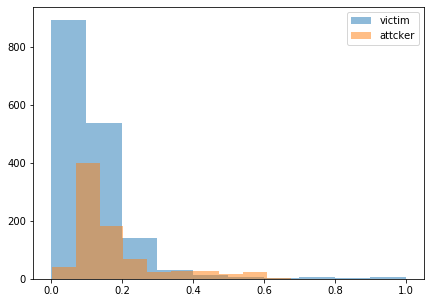

In [7]:
# add standardization
std_userScoreP = userScoreP
std_userScoreP['P'] = (std_userScoreP['P'] - std_userScoreP['P'].min(axis=0)) / (std_userScoreP['P'].max(axis=0) - std_userScoreP['P'].min(axis=0))

fig = showscore(userScoreP, 'P') # P scores

# fig.savefig('./' + config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + '_P_distr' + '.png')

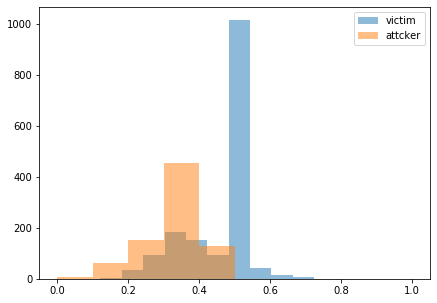

In [8]:
# add standardization
std_userScorePQ_online = userScorePQ_online
std_userScorePQ_online['PoverQ_online'] = (std_userScorePQ_online['PoverQ_online'] - std_userScorePQ_online['PoverQ_online'].min(axis=0)) / (std_userScorePQ_online['PoverQ_online'].max(axis=0) - std_userScorePQ_online['PoverQ_online'].min(axis=0))

fig = showscore(std_userScorePQ_online, 'PoverQ_online') # online Q

# fig.savefig('./' + config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + '_PQonline_distr' + '.png')

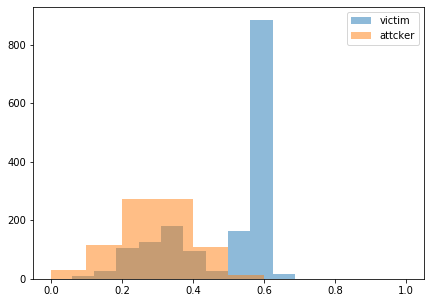

In [9]:
# add standardization
std_userScorePQ_offline = userScorePQ_offline
std_userScorePQ_offline['PoverQ_offline'] = (std_userScorePQ_offline['PoverQ_offline'] - std_userScorePQ_offline['PoverQ_offline'].min(axis=0)) / (std_userScorePQ_offline['PoverQ_offline'].max(axis=0) - std_userScorePQ_offline['PoverQ_offline'].min(axis=0))

fig = showscore(std_userScorePQ_offline, 'PoverQ_offline') # offline Q

# fig.savefig('./' + config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + '_PQoffline_distr' + '.png')

### Predicted P-only user scores

In [10]:
print("Length of userScoreP: ", len(userScoreP))

Length of userScoreP:  2447


In [18]:
agt_normals = []
agt_attacks = []
attacker='172.16.0.1'; victim='192.168.10.50'
print("Length of userScoreP: ", len(userScoreP))

for (IP, IPD, score) in list(userScoreP.itertuples(index=False, name=None)):
#     if (IP != '172.16.0.1' and  IPD=='192.168.10.50') or IP == '192.168.10.50': 
#     if (IP != attacker and  IPD==victim) or IP == victim: 
    if IP == attacker or IP == victim:
        agt_attacks.append(IP+IPD)
    else:
        agt_normals.append(IP + IPD)
        

print("Length of Normal traffic: ", len(agt_normals))
print("Length of true attacks: ", len(agt_attacks))

#Plot some graphs
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

num = len(agt_normals)
print("Percent: ", num/len(userScoreP))

Length of userScoreP:  2447
Length of Normal traffic:  1069
Length of true attacks:  1378
Percent:  0.43686146301593787


In [19]:
classifier_rejectthres = 0.6 #0.5149
fp_classifier = 0.0037418147801683817

fp_classifier

0.0037418147801683817

In [20]:
# LOIC
# Length of test data:  2447
# Number of normal traffic:  1069
# Number of true attacks:  1378
# Percent attacks:  0.5631385369840621

# (ℓ = ∞)
iter_classifier = [0,
 0.005612722170252572,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 0.006548175865294668,
 1.0]

In [21]:
# (ℓ = 1)
iter_classifier_one = [0,
 0.012930177043962602,
 0.019892580067634773,
 0.024666799283867117,
 0.02834692659637955,
 0.03242490551024468,
 0.039188382733240504,
 0.048836284066043366,
 0.05967774020290432,
 0.07817783966580466,
 1.0]


# iter_classifier_one =  [0,
#  0.13479923518164436,
#  0.3365200764818356,
#  0.33747609942638623,
#  0.35181644359464626,
#  0.361376673040153,
#  0.40296367112810705,
#  0.4392925430210325,
#  0.4679732313575526,
#  0.6261950286806883,
#  1.0]

In [22]:
iter_classifier_two = [0,
 0.01028999064546305,
 0.01216089803554724,
 0.0608044901777362,
 0.10944808231992516,
 0.18054256314312442,
 0.27128157156220767,
 0.3906641721234799,
 0.4333021515434986,
 0.5794200187090739,
 1.0]

# [0,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  0.004780114722753346,
#  1.0]

In [23]:
graphP, P_tpr = calculateFalsePositives(agt_normals, agt_attacks, userScoreP, percentages, num)
graphPQ_online, onlinePQ_tpr = calculateFalsePositives(agt_normals, agt_attacks, userScorePQ_online, percentages, num)
graphPQ_offline, offlinePQ_tpr  = calculateFalsePositives(agt_normals, agt_attacks, userScorePQ_offline, percentages, num)
# graphQonline, _ = calculateFalsePositives(agt_normals, agt_attacks, userScoreQonline, percentages, num)
# graphQoffline, _ = calculateFalsePositives(agt_normals, agt_attacks, userScoreQoffline, percentages, num)   

graphP.insert(0, 0)
graphPQ_online.insert(0, 0)
graphPQ_offline.insert(0, 0)
# graphQonline.insert(0, 0)
# graphQoffline.insert(0, 0)

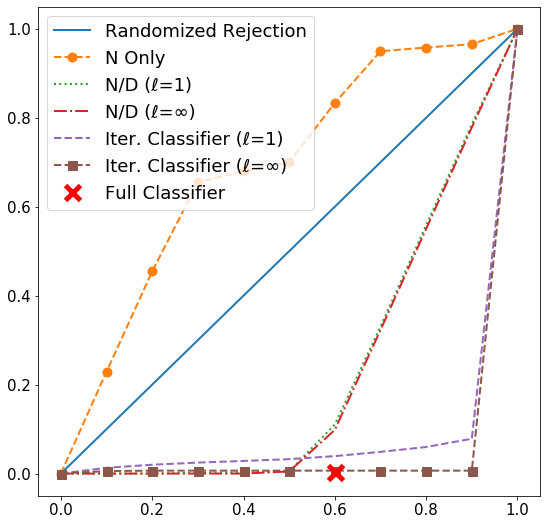

In [33]:
# not including iter_classifier_two
plotAndSaveGraph(graphPQ_online, graphP, graphPQ_offline, 
                 classifier_rejectthres, fp_classifier, iter_classifier_one, iter_classifier, config) #, plt=True)

### Calculate evaluation metrics 

In [25]:
P_metrics = np.array(np.transpose(calc_eval(graphP, P_tpr, agt_normals, agt_attacks)))
onlinePQ_metrics = np.array(np.transpose(calc_eval(graphPQ_online, onlinePQ_tpr, agt_normals, agt_attacks)))
offlinePQ_metrics = np.array(np.transpose(calc_eval(graphPQ_offline, offlinePQ_tpr, agt_normals, agt_attacks)))

P_metrics = pd.DataFrame(P_metrics, columns=['Accr_P', 'FPR_P', 'Prec_P', 'Rec_P', 'F1_P'])
onlinePQ_metrics = pd.DataFrame(onlinePQ_metrics, columns=['Accr_onPQ', 'FPR_onPQ', 
                                                           'Prec_onPQ', 'Rec_onPQ', 'F1_onPQ'])
offlinePQ_metrics = pd.DataFrame(offlinePQ_metrics, columns=['Accr_offPQ', 'FPR_offPQ', 
                                                             'Prec_offPQ', 'Rec_offPQ', 'F1_offPQ'])
df_FPresults = pd.concat([P_metrics,onlinePQ_metrics,offlinePQ_metrics],axis=1)

# df_FPresults.to_csv(config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + 
#                     "_evalresults.csv", index=False)

/home/wesleyjtann/miniconda3/envs/ddos/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide


In [16]:
# Rows 3=0.4, 4=0.5, 5=0.6
df_FPresults#.iloc[4]

,Accr_P,FPR_P,Prec_P,Rec_P,F1_P,Accr_onPQ,FPR_onPQ,Prec_onPQ,Rec_onPQ,F1_onPQ,Accr_offPQ,FPR_offPQ,Prec_offPQ,Rec_offPQ,F1_offPQ
0,0.336739,0.229186,0.000000,0.000000,NaN,0.536984,0.000000,1.000000,0.177794,0.301910,0.536984,0.000000,1.000000,0.177794,0.301910
1,0.239886,0.454630,0.008163,0.002903,0.004283,0.637107,0.000000,1.000000,0.355588,0.524625,0.637107,0.000000,1.000000,0.355588,0.524625
2,0.165100,0.654818,0.047619,0.025399,0.033128,0.735595,0.001871,0.997279,0.531930,0.693800,0.737229,0.000000,1.000000,0.533382,0.695693
3,0.242746,0.680075,0.257406,0.182874,0.213831,0.834491,0.002806,0.996936,0.708273,0.828171,0.836943,0.000000,1.000000,0.710450,0.830717
4,0.325705,0.699719,0.388889,0.345428,0.365872,0.932979,0.004677,0.995915,0.884615,0.936972,0.932979,0.004677,0.995915,0.884615,0.936972
5,0.308950,0.833489,0.393465,0.419448,0.406041,0.940744,0.110384,0.919673,0.980406,0.949069,0.951369,0.098223,0.928523,0.989840,0.958202
6,0.307315,0.949486,0.407472,0.506531,0.451634,0.848386,0.330215,0.793929,0.986938,0.879974,0.854924,0.322732,0.798599,0.992743,0.885150
7,0.400082,0.957905,0.477017,0.677794,0.559952,0.749081,0.558466,0.695097,0.987663,0.815947,0.756436,0.550047,0.699694,0.994194,0.821343
8,0.493666,0.965388,0.531548,0.849782,0.654007,0.651410,0.784846,0.619156,0.989840,0.761798,0.657131,0.778297,0.622333,0.994920,0.765708
9,0.563139,1.000000,0.563139,1.000000,0.720523,0.563139,1.000000,0.563139,1.000000,0.720523,0.563139,1.000000,0.563139,1.000000,0.720523


In [17]:
# reject 50%
df_FPresults.iloc[4]

Accr_P        0.325705
FPR_P         0.699719
Prec_P        0.388889
Rec_P         0.345428
F1_P          0.365872
Accr_onPQ     0.932979
FPR_onPQ      0.004677
Prec_onPQ     0.995915
Rec_onPQ      0.884615
F1_onPQ       0.936972
Accr_offPQ    0.932979
FPR_offPQ     0.004677
Prec_offPQ    0.995915
Rec_offPQ     0.884615
F1_offPQ      0.936972
Name: 4, dtype: float64

### Calculate evaluation metrics 

In [18]:
fpr=graphP; tpr=P_tpr
# fpr=graphPQ_online; tpr=onlinePQ_tpr
# fpr=graphPQ_offline; tpr=offlinePQ_tpr

In [19]:
tau = 5 #3=0.4, 4=0.5, 5=0.6
fpr = np.array(fpr[1:])
tpr = np.array(tpr)

Total = len(agt_normals)+len(agt_attacks) #len(userScoreP)
TotalN = len(agt_normals)
TotalP = Total-TotalN
FP = fpr*TotalN
TN = TotalN - FP
TP = tpr*TotalP
FN = TotalP-TP

print(Total, TotalN, TotalP, FP[tau], TN[tau], TP[tau], FN[tau])

2447 1069 1378 891.0 178.0 578.0 800.0


In [20]:
Accr = (TP+TN) / (TP+TN+FP+FN)
FPR = FP / (FP + TN)
Prec = TP / (TP + FP)
Rec = TP / (TP + FN)
F1 = 2 * ((Prec*Rec) / (Prec+Rec))

print(Accr[tau], FPR[tau], Prec[tau], Rec[tau], F1[tau])

0.3089497343686146 0.833489242282507 0.3934649421375085 0.41944847605224966 0.40604144713733753


/home/wesleyjtann/miniconda3/envs/ddos/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [21]:
graphP = np.array(graphP)
graphPQ= np.array(graphPQ_online)
graphPQTil= np.array(graphPQ_offline)

df_FPresults = pd.DataFrame({"P_FP":graphP[1:], "OnlineQ_FP":graphPQ[1:], "OfflineQ_FP":graphPQTil[1:], 
                             "Accr":Accr, "FPR":FPR, "Precision":Prec, 
                             "Recall":Rec, "F1_score":F1})

# df_FPresults.to_csv(config['metadata']['uniqueID'] + '/' + config['metadata']['result'] + 
#                     "_FP_finalresults.csv", index=False)

In [22]:
df_FPresults

,P_FP,OnlineQ_FP,OfflineQ_FP,Accr,FPR,Precision,Recall,F1_score
0,0.229186,0.000000,0.000000,0.336739,0.229186,0.000000,0.000000,NaN
1,0.454630,0.000000,0.000000,0.239886,0.454630,0.008163,0.002903,0.004283
2,0.654818,0.001871,0.000000,0.165100,0.654818,0.047619,0.025399,0.033128
3,0.680075,0.002806,0.000000,0.242746,0.680075,0.257406,0.182874,0.213831
4,0.699719,0.004677,0.004677,0.325705,0.699719,0.388889,0.345428,0.365872
5,0.833489,0.110384,0.098223,0.308950,0.833489,0.393465,0.419448,0.406041
6,0.949486,0.330215,0.322732,0.307315,0.949486,0.407472,0.506531,0.451634
7,0.957905,0.558466,0.550047,0.400082,0.957905,0.477017,0.677794,0.559952
8,0.965388,0.784846,0.778297,0.493666,0.965388,0.531548,0.849782,0.654007
9,1.000000,1.000000,1.000000,0.563139,1.000000,0.563139,1.000000,0.720523
